In [2]:
# play with a single ip to see what it looks like
# https://www.nylas.com/blog/use-python-requests-module-rest-apis/
import requests

ip_variable = "115.56.115.248"

response = requests.get("https://ipinfo.io/"+ip_variable)

# response holds all that came back from request
print(response)
print(response.json())

# get the location key value
loc = response.json()['loc']
# since this isn't a list, I need to break this up
print(loc)
#print(type(loc))
print(loc.split(","))
lat = loc.split(",")[0]
lon = loc.split(",")[1]

# scattergeo will need floats in the end, don't forget to convert!
print(float(lat))
print(float(lon))

<Response [200]>
{'ip': '115.56.115.248', 'city': 'Beijing', 'region': 'Beijing', 'country': 'CN', 'loc': '39.9075,116.3972', 'org': 'AS4837 CHINA UNICOM China169 Backbone', 'timezone': 'Asia/Shanghai', 'readme': 'https://ipinfo.io/missingauth'}
39.9075,116.3972
['39.9075', '116.3972']
39.9075
116.3972


In [3]:
import csv
import time

# putting the usernames and ips into a list so I can use them later
with open("data/auth.logs.csv", 'r') as f:
    reader = csv.reader(f)
    usernames, ips = [], []

    for row in reader:
        usernames.append(row[0].strip())
        ips.append(row[1].strip())

# print first 10 as proof
print(ips[:10])
print(len(ips))

lats, lons = [],[]

for ip in ips[:20]:
    # need to slow down API requests
    time.sleep(0.5)

    response = requests.get("https://ipinfo.io/"+ip)

    loc = response.json()['loc']
    print(loc)
    lats.append(float(loc.split(",")[0]))
    lons.append(float(loc.split(",")[1]))

print(lats[:10])
print(lons[:10])

['108.222.118.252', '108.222.118.252', '108.222.118.252', '106.55.241.103', '121.4.55.87', '103.205.68.2', '167.172.207.63', '141.98.10.193', '141.98.10.193', '141.98.10.193']
652
39.6895,-84.1688
39.6895,-84.1688
39.6895,-84.1688
39.9075,116.3972
31.2222,121.4581
23.7104,90.4074
37.3483,-121.9844
54.6892,25.2798
54.6892,25.2798
54.6892,25.2798
54.6892,25.2798
36.1750,-115.1372
36.1750,-115.1372
36.1750,-115.1372
36.1750,-115.1372
36.1750,-115.1372
36.1750,-115.1372
36.1750,-115.1372
36.1750,-115.1372
36.1750,-115.1372
[39.6895, 39.6895, 39.6895, 39.9075, 31.2222, 23.7104, 37.3483, 54.6892, 54.6892, 54.6892]
[-84.1688, -84.1688, -84.1688, 116.3972, 121.4581, 90.4074, -121.9844, 25.2798, 25.2798, 25.2798]


In [4]:
from plotly.graph_objs import Scattergeo, Layout
from plotly import offline

data = [{
    'type': 'scattergeo',
    'lon': lons,
    'lat': lats,
    'marker': {
        'colorscale': 'Viridis',
        'reversescale': True,
    },
}]

figure_layout = Layout(title='IP Sources')

fig = {
    'data': data, 
    'layout': figure_layout
}

offline.plot(fig, filename='ip-sources.html')

'ip-sources.html'

In [5]:
# remove duplicate ips for API query optimization

print(len(ips))

nd_ips = []
for ip in ips:
    if ip not in nd_ips:
        nd_ips.append(ip)

print(len(nd_ips))

652
142


In [6]:
# remove duplicate usernames

print(len(usernames))

nd_usernames = []
for  username in usernames:
    if username not in nd_usernames:
        nd_usernames.append(username)

print(len(nd_usernames))

print(usernames[:10])
print(nd_usernames[:10])

# next step, maybe a dictionary that does a count on username frequency

652
153
['kduncan', 'kduncan', 'kduncan', 'tester', 'webmaster', 'samba', 'info', 'user', 'user', 'user']
['kduncan', 'tester', 'webmaster', 'samba', 'info', 'user', 'es', 'admin', 'ansible', 'deploy']


In [7]:
import csv
import time

# putting the usernames and ips into a list so I can use them later
with open("data/auth.logs.csv", 'r') as f:
    reader = csv.reader(f)
    usernames, ips = [], []

    for row in reader:
        usernames.append(row[0].strip())
        ips.append(row[1].strip())

# print first 10 as proof
print(ips[:10])
print(len(ips))

# remove duplicate ips
nd_ips = []
for ip in ips:
    if ip not in nd_ips:
        nd_ips.append(ip)

lats, lons = [],[]

for ip in nd_ips:
    # need to slow down API requests
    time.sleep(0.5)

    response = requests.get("https://ipinfo.io/"+ip)

    loc = response.json()['loc']
    print(loc)
    lats.append(float(loc.split(",")[0]))
    lons.append(float(loc.split(",")[1]))

print(lats[:10])
print(lons[:10])

['108.222.118.252', '108.222.118.252', '108.222.118.252', '106.55.241.103', '121.4.55.87', '103.205.68.2', '167.172.207.63', '141.98.10.193', '141.98.10.193', '141.98.10.193']
652
39.6895,-84.1688
39.9075,116.3972
31.2222,121.4581
23.7104,90.4074
37.3483,-121.9844
54.6892,25.2798
36.1750,-115.1372
52.3740,4.8897
35.9439,126.9544
30.9120,75.8538
31.2222,121.4581
36.1750,-115.1372
46.2991,30.6553
41.6552,-4.7237
36.1750,-115.1372
37.5660,126.9784
36.0649,120.3804
17.4995,-88.1976
49.6117,6.1300
48.8534,2.3488
40.7143,-74.0060
45.5088,-73.5878
40.8043,-74.0121
40.4165,-3.7026
31.2222,121.4581
22.2783,114.1747
54.6704,25.2711
40.8344,-74.1377
59.4370,24.7535
22.2783,114.1747
39.9075,116.3972
22.5455,114.0683
39.9075,116.3972
13.2257,77.5750
42.6000,23.0333
52.5244,13.4105
52.2298,21.0118
51.2217,6.7762
40.8344,-74.1377
31.2222,121.4581
39.9075,116.3972
40.8043,-74.0121
23.1167,113.2500
33.4484,-112.0740
48.8534,2.3488
52.5244,13.4105
59.3294,18.0687
52.5244,13.4105
22.2783,114.1747
56.4977

(array([16., 15., 15., 15., 15., 16., 15., 15., 15., 16.]),
 array([  0. ,  15.2,  30.4,  45.6,  60.8,  76. ,  91.2, 106.4, 121.6,
        136.8, 152. ]),
 <BarContainer object of 10 artists>)

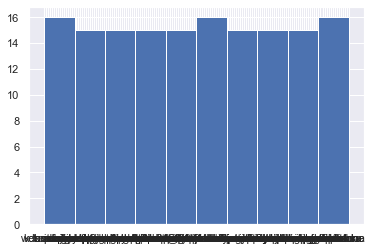

In [8]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

#plt.hist(usernames)

In [1]:
wordstring = 'it was the best of times it was the worst of times '
wordstring += 'it was the age of wisdom it was the age of foolishness'

wordlist = wordstring.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

print("String\n" + wordstring +"\n")
print("List\n" + str(wordlist) + "\n")
print("Frequencies\n" + str(wordfreq) + "\n")
print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

String
it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness

List
['it', 'was', 'the', 'best', 'of', 'times', 'it', 'was', 'the', 'worst', 'of', 'times', 'it', 'was', 'the', 'age', 'of', 'wisdom', 'it', 'was', 'the', 'age', 'of', 'foolishness']

Frequencies
[4, 4, 4, 1, 4, 2, 4, 4, 4, 1, 4, 2, 4, 4, 4, 2, 4, 1, 4, 4, 4, 2, 4, 1]

Pairs
[('it', 4), ('was', 4), ('the', 4), ('best', 1), ('of', 4), ('times', 2), ('it', 4), ('was', 4), ('the', 4), ('worst', 1), ('of', 4), ('times', 2), ('it', 4), ('was', 4), ('the', 4), ('age', 2), ('of', 4), ('wisdom', 1), ('it', 4), ('was', 4), ('the', 4), ('age', 2), ('of', 4), ('foolishness', 1)]


In [3]:
# Given a list of words, return a dictionary of
# word-frequency pairs.

def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

# Sort a dictionary of word-frequency pairs in
# order of descending frequency.

def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux


dictionary = wordListToFreqDict(usernames)
sorteddict = sortFreqDict(dictionary)

for s in sorteddict: print(str(s))

NameError: name 'usernames' is not defined